**NEURAL NETWORKS**

GRUP 4: Arnau Alabau, Sergi Ubach, María Casals


In [1]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [2]:
#Codi per treure la sigmoide

def sigmoide(value):
    z = 1/(1 + np.exp(-(value)))

    #plt.plot(x, z)
    #plt.xlabel("x")
    #plt.ylabel("Sigmoid(X)")

    #plt.show()
    #print("Z")
    #print(z)
    return z

### Class Neuron

Aquesta classe preten definir una neurona de la xarxa neuronal

*Atributs:*
- nInputs: numero d'entrades que te la neurona
- output: valor de sortida
- bias: "offset" necessari
- weight: array ambs els pesos que determinen cada entrada


*Funcions:*
- calcula: ha de fer el calcul (inputs*weight + bias ) *sigmoide 
    - DUBTE: No se com es la operacio en concret


In [3]:
class Neuron:
    
    def __init__(self, nInputs):
        
        #Atributs
        self.nInputs = 0
        self.output = 0
        self.bias = 0
        self.weight = []
        
        self.nInputs = nInputs
          
        self.bias = random.uniform(-self.nInputs, self.nInputs)

        for i in range (self.nInputs):
            self.weight.append(random.uniform(-1, 1))
            
    def calcula(self, inputs):
        #print('INPUTS \n')
        #print(inputs)
        #print('WEIGHT \n')
        #print(self.weight)
        #print('BIAS \n')
        #print(self.bias)
        
        aux = sum(np.multiply(inputs,self.weight)) + self.bias
        output = sigmoide(aux)
        #print("Output calcula NEURON ")
        #print(output)
        return output
            

### Class Layer

Aquesta classe preten definir una capa de la xarxa neuronal

*Atributs:*
- nNeurons: numero de neurones que te la capa, coincideix amb el numero de outputs
- nInputs: numero d'entrades que te la capa


*Funcions:*
- calcula: ha de recorrer cada una de les neurones, passarli el vector d'entrada i obtenir la sortida de cada una


In [4]:
class Layer:
    
    def __init__(self, nNeurons, nInputs):
        
        #Atributs
        #self.nNeurons = 0
        #self.nInputs = 0 #num de neurones de la capa anterior, si es la 1a, es numInputs
        self.neurons = []
        #el num de neurones ve determinat pel numero de sortides, nOuputs = nNeurons
        
        self.nInputs = nInputs
        self.nNeurons = nNeurons
        for i in range (nNeurons):
            self.neurons.append(Neuron(nInputs))

            
    def calcula(self, inputs):
        output = []
        for i in range (self.nNeurons):
            output.append(self.neurons[i].calcula(inputs))
            #print("Output calcula LAYER " + str(i))
            #print(output)
            
        return output            

### Class NeuralNetwork

Aquesta classe preten definir la xarxa neuronal sencera sobre la que treballarem

*Atributs:*
- nLayers: numero de capes que te la xarxa
- nInputs: numero d'entrades que te la xarxa
- nOuputs: numero de sortides que te la xarxa


*Funcions:*
- calcula: no se que fa jaja


In [5]:
class NeuralNetwork:

    
    def __init__(self, nInputs, nLayers, neuronsInLayer):
        
        #Atributs
        self.nLayers = 0
        self.nInputs = 0
        self.neuronsInLayer = []
        self.layers = []

        self.nInputs = nInputs
        self.nLayers = nLayers
        self.neuronsInLayer = neuronsInLayer
        
        for i in range (self.nLayers):
             #crear layers
            if (i == 0) :
                self.layers.append(Layer(self.neuronsInLayer[i], self.nInputs))
            else:
                self.layers.append(Layer(self.neuronsInLayer[i], self.neuronsInLayer[i-1]))
        
        
    def calcula(self, inputs):
        aux = []
        for i in range (self.nLayers):

            if (i == 0) :
                aux = self.layers[i].calcula(inputs)
                
            else: 
                aux = self.layers[i].calcula(aux)  
                
            #print("Output calcula NETWORK " + str(i))
            #print(aux)
        return aux

In [6]:
def logicFunction(code):
    return (code[1]&(not code[2]))|(code[0]&code[1])

In [27]:
def logicFunction2(code):
    return (code[0]|code[1])

In [8]:
def calculaError(result, code):
    
    error = (logicFunction2(code) - result[0])**2;
    
    return error

In [20]:
def evaluate(nn):
    
    totalErrors = []
    for i in range (nIndividuals):
        
        error = 0
        
        for j in range (len(inputCode)):
            result = nn[i].calcula(inputCode[j])
            
            error += calculaError(result, inputCode[j])
            
        totalErrors.append(error)
    
    return totalErrors

In [10]:
def getParents(totalErrors, nn):
    mappedList = list(map(abs,totalErrors))
    inds = np.argsort(mappedList)
    
    
    minError.append(totalErrors[inds[0]])
    
    parent1 = nn[inds[0]]
    parent2 = nn[inds[1]]
    
    return parent1, parent2

In [11]:
def generateOffspring(parent1, parent2):
    
    offspring = []
    
    for i in range (nIndividuals - 2):
        offspring.append(NeuralNetwork(nInputs, nLayers, neuronsInLayer))
    
    offspring.append(parent1)
    offspring.append(parent2)
    
    for i in range(nIndividuals - 2):
        for j in range(nLayers):
            for m in range(offspring[i].neuronsInLayer[j]):
                
                #BIAS
                p = random.uniform(0,1)
                if p <= 0.5:
                    #parent1
                    offspring[i].layers[j].neurons[m].bias = parent1.layers[j].neurons[m].bias
                if p > 0.5:
                    #parent2
                    offspring[i].layers[j].neurons[m].bias = parent2.layers[j].neurons[m].bias
                  
                #WEIGHTS
                for w in range(len(offspring[i].layers[j].neurons[m].weight)):
                    p = random.uniform(0,1)
                    if p <= 0.5:
                        #parent1
                        offspring[i].layers[j].neurons[m].weight[w] = parent1.layers[j].neurons[m].weight[w]
                    if p > 0.5:
                        #parent2
                        offspring[i].layers[j].neurons[m].weight[w] = parent2.layers[j].neurons[m].weight[w]
                #MUTATION
                p = random.uniform(0,1)
                if p <= 0.1:
                    #mutation bias
                    value = random.uniform(-0.1,+0.1)
                    offspring[i].layers[j].neurons[m].bias += value
                
                    #mutation weight
                    for w in range(len(offspring[i].layers[j].neurons[m].weight)):
                        value = random.uniform(-0.1,+0.1)
                        offspring[i].layers[j].neurons[m].weight[w] += value
                       
    return offspring
          

## Ask for data

In [24]:
nIndividuals = int(input("How many individuals per generation do you want? "))
nGenerations = int(input("How many generations do you want to try? "))


nInputs = int(input("How many inputs do you want in your Neural Network? "))
nLayers = int(input("How many layers do you want in your Neural Network? "))
neuronsInLayer = []

for i in range (nLayers):

    aux = int(input("How many neurons do you want in layer number "+ str(i+1)+"? "))
    neuronsInLayer.append(aux)

nLayers += 1
neuronsInLayer.append(1)

inputCode = [[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]]


How many individuals per generation do you want? 100
How many generations do you want to try? 20
How many inputs do you want in your Neural Network? 3
How many layers do you want in your Neural Network? 2
How many neurons do you want in layer number 1? 3
How many neurons do you want in layer number 2? 4


## Generate X number of Neural Networks

In [28]:
neuralNetworks = []
minError = []

for i in range (nIndividuals):
    neuralNetworks.append(NeuralNetwork(nInputs, nLayers, neuronsInLayer))

    
totalErrors = evaluate(neuralNetworks)

parent1, parent2 = getParents(totalErrors, neuralNetworks)


for i in range (nGenerations - 1):
    
    offspring = generateOffspring(parent1, parent2)
    
    totalErrors = evaluate(offspring)

    parent1, parent2 = getParents(totalErrors, offspring)
    

RESULT
[0.8212265206279199]
RESULT
[0.8213637474224633]
RESULT
[0.8225591723671265]
RESULT
[0.8227962528217182]
RESULT
[0.821230513263508]
RESULT
[0.8213053244166826]
RESULT
[0.8220218511792152]
RESULT
[0.822158717524297]
RESULT
[0.8099838907845026]
RESULT
[0.8078836351798466]
RESULT
[0.8096450118409512]
RESULT
[0.8075654253743452]
RESULT
[0.8101332384948242]
RESULT
[0.8080434520613843]
RESULT
[0.8100660746013274]
RESULT
[0.807997836465103]
RESULT
[0.6872787347672791]
RESULT
[0.6838011938866876]
RESULT
[0.6978654178368409]
RESULT
[0.6966717695897358]
RESULT
[0.6855979639827378]
RESULT
[0.6862435677043298]
RESULT
[0.6976541775514732]
RESULT
[0.6972875382777488]
RESULT
[0.04773750087340573]
RESULT
[0.048228486594368666]
RESULT
[0.04812776797347123]
RESULT
[0.048511055703368805]
RESULT
[0.0474314290964455]
RESULT
[0.04808629018523714]
RESULT
[0.04783313127156439]
RESULT
[0.048389130111390496]
RESULT
[0.9330293926374272]
RESULT
[0.9329550938998326]
RESULT
[0.9331419073645795]
RESULT
[0.933

RESULT
[0.4135934413855685]
RESULT
[0.40012786718390975]
RESULT
[0.4074002418241577]
RESULT
[0.4031704167483477]
RESULT
[0.40973074996611486]
RESULT
[0.39652419860843713]
RESULT
[0.4034773337350967]
RESULT
[0.7191449356625448]
RESULT
[0.7199599956126056]
RESULT
[0.7205154804282672]
RESULT
[0.72035730964443]
RESULT
[0.7201883021824111]
RESULT
[0.7212905699772142]
RESULT
[0.7215625580464285]
RESULT
[0.7217698142306782]
RESULT
[0.2469314091675261]
RESULT
[0.243474380716951]
RESULT
[0.23952174119857605]
RESULT
[0.23657879674945165]
RESULT
[0.24681120995742659]
RESULT
[0.24326780455867414]
RESULT
[0.23941132911745022]
RESULT
[0.2364150921041891]
RESULT
[0.851228267024375]
RESULT
[0.8504477663222029]
RESULT
[0.8485839008985347]
RESULT
[0.8484608460876903]
RESULT
[0.8495587183573075]
RESULT
[0.8491441984912361]
RESULT
[0.8462159550623873]
RESULT
[0.8468157548592841]
RESULT
[0.9406780864443383]
RESULT
[0.9406054698199097]
RESULT
[0.9406163014896884]
RESULT
[0.94053309434612]
RESULT
[0.94012923

RESULT
[0.833052550581153]
RESULT
[0.8345438956238841]
RESULT
[0.8344646966729824]
RESULT
[0.7213464716076573]
RESULT
[0.72208138900169]
RESULT
[0.7203752513471539]
RESULT
[0.7212619403927767]
RESULT
[0.7220408018823558]
RESULT
[0.7226666518841212]
RESULT
[0.7210768400833545]
RESULT
[0.7218513872321723]
RESULT
[0.8220672668388044]
RESULT
[0.8200960454863575]
RESULT
[0.821110879574343]
RESULT
[0.8194009417787779]
RESULT
[0.8255087131627445]
RESULT
[0.8231032306163001]
RESULT
[0.8247229445645353]
RESULT
[0.8222440220604458]
RESULT
[0.898779479691618]
RESULT
[0.8992002108030185]
RESULT
[0.8991058418496679]
RESULT
[0.8992606191867527]
RESULT
[0.8977030658553435]
RESULT
[0.8987143347036265]
RESULT
[0.8984546046946673]
RESULT
[0.8990841278644728]
RESULT
[0.846738230115621]
RESULT
[0.8468129081562676]
RESULT
[0.8469984884462689]
RESULT
[0.8471951412595927]
RESULT
[0.8488451465666524]
RESULT
[0.8488140247829284]
RESULT
[0.8489543716642164]
RESULT
[0.8489548117843801]
RESULT
[0.8505886889331918

RESULT
[0.8449578823546564]
RESULT
[0.8485804914517745]
RESULT
[0.8476313008552677]
RESULT
[0.8498029833567742]
RESULT
[0.8492797919388176]
RESULT
[0.8526480170508824]
RESULT
[0.852271273702775]
RESULT
[0.7605490517759927]
RESULT
[0.7609941919390452]
RESULT
[0.763310116472098]
RESULT
[0.7628289494277208]
RESULT
[0.7591740683401824]
RESULT
[0.760330750984168]
RESULT
[0.762765429540076]
RESULT
[0.7632871807573731]
RESULT
[0.7108548285098427]
RESULT
[0.7104648417364424]
RESULT
[0.7073526255663357]
RESULT
[0.7076712350797997]
RESULT
[0.711412366466769]
RESULT
[0.7115559842828625]
RESULT
[0.7075844636605407]
RESULT
[0.7082510187558239]
RESULT
[0.7612355704993709]
RESULT
[0.759464367037963]
RESULT
[0.7632995911045042]
RESULT
[0.761182748014076]
RESULT
[0.7638148750293536]
RESULT
[0.7615599439413362]
RESULT
[0.7658142498482291]
RESULT
[0.7637930819994816]
RESULT
[0.8687657438732761]
RESULT
[0.8695843986690345]
RESULT
[0.871543245857328]
RESULT
[0.8714138977970397]
RESULT
[0.8698362042211252]


[0.6817251199335823]
RESULT
[0.6791147568869652]
RESULT
[0.687133406814341]
RESULT
[0.6855057300278009]
RESULT
[0.7060999046121282]
RESULT
[0.7022806055815135]
RESULT
[0.7115042203564275]
RESULT
[0.707225221681219]
RESULT
[0.712267229756626]
RESULT
[0.7078488490359368]
RESULT
[0.7170034889512278]
RESULT
[0.7135282527551541]
RESULT
[0.743248849340219]
RESULT
[0.7421185895427563]
RESULT
[0.7472658821135815]
RESULT
[0.7460206459670622]
RESULT
[0.747804002445671]
RESULT
[0.746493042810297]
RESULT
[0.7513921648082285]
RESULT
[0.7505451233933876]
RESULT
[0.8292268884751095]
RESULT
[0.8250695239243254]
RESULT
[0.8349899334609479]
RESULT
[0.8301687686089451]
RESULT
[0.8357149929934111]
RESULT
[0.8307918115590892]
RESULT
[0.8409034385365574]
RESULT
[0.8367647624345692]
RESULT
[0.8491316322357038]
RESULT
[0.8493398033037896]
RESULT
[0.8499546441006406]
RESULT
[0.8511165694052644]
RESULT
[0.8506251711266823]
RESULT
[0.8516653325201536]
RESULT
[0.8505784881780584]
RESULT
[0.8524899939702385]
RESUL

RESULT
[0.7559751459944426]
RESULT
[0.7526404731684954]
RESULT
[0.76262677793077]
RESULT
[0.7596740112697297]
RESULT
[0.7635085779172279]
RESULT
[0.7604911907601242]
RESULT
[0.7690668310473202]
RESULT
[0.7669987400771672]
RESULT
[0.7501182102327202]
RESULT
[0.7475354764386962]
RESULT
[0.7570873455457613]
RESULT
[0.7545490661691612]
RESULT
[0.758043280263904]
RESULT
[0.7553570765198825]
RESULT
[0.7641072286564996]
RESULT
[0.7623778942813679]
RESULT
[0.7502026738081075]
RESULT
[0.7476550862395295]
RESULT
[0.757202546747844]
RESULT
[0.7547177451026744]
RESULT
[0.7581366922853899]
RESULT
[0.7554938860502529]
RESULT
[0.7642331603319367]
RESULT
[0.7625645997139107]
RESULT
[0.750286178229883]
RESULT
[0.7468787225672465]
RESULT
[0.7586427071387409]
RESULT
[0.7541264317250129]
RESULT
[0.7591858555145813]
RESULT
[0.7546362364213259]
RESULT
[0.7675934733512789]
RESULT
[0.7631803322950393]
RESULT
[0.7595671619689716]
RESULT
[0.7558750375129845]
RESULT
[0.7660230509938002]
RESULT
[0.762721876544974

RESULT
[0.7710233475489788]
RESULT
[0.7501179983439539]
RESULT
[0.746544116355473]
RESULT
[0.75857170643355]
RESULT
[0.7538560091811338]
RESULT
[0.7591734792203054]
RESULT
[0.7544554090178793]
RESULT
[0.7676907655873907]
RESULT
[0.7630868047101914]
RESULT
[0.759218848429731]
RESULT
[0.7556619844667305]
RESULT
[0.765956927123948]
RESULT
[0.762798344543801]
RESULT
[0.7673066799418029]
RESULT
[0.7640999557522004]
RESULT
[0.7728904644887489]
RESULT
[0.7706845894129845]
RESULT
[0.7465376100290475]
RESULT
[0.7440748982500129]
RESULT
[0.7531747835627568]
RESULT
[0.7502375700719178]
RESULT
[0.754220693729829]
RESULT
[0.7512090981148052]
RESULT
[0.7607291436162004]
RESULT
[0.7580941702140476]
RESULT
[0.759920201320824]
RESULT
[0.756316001192543]
RESULT
[0.7666460673312111]
RESULT
[0.7635684552943403]
RESULT
[0.767464923008472]
RESULT
[0.7643021122688659]
RESULT
[0.7730079618534728]
RESULT
[0.7708705345827369]
RESULT
[0.7481578156176925]
RESULT
[0.7456772203227657]
RESULT
[0.7549581616550931]
RE

[0.7553456422908953]
RESULT
[0.764027429605918]
RESULT
[0.7622469915141451]
RESULT
[0.7502665147066603]
RESULT
[0.7470420010715063]
RESULT
[0.7585361570269566]
RESULT
[0.7542962126523867]
RESULT
[0.7592621927092059]
RESULT
[0.7549518932268174]
RESULT
[0.7676125993194362]
RESULT
[0.7635088522782227]
RESULT
[0.7502054615806034]
RESULT
[0.7472634233592982]
RESULT
[0.757207034728972]
RESULT
[0.754198756534546]
RESULT
[0.7581903490316436]
RESULT
[0.755119673015497]
RESULT
[0.7642851257697176]
RESULT
[0.7620675761114689]
RESULT
[0.7493056879166229]
RESULT
[0.7456354301056578]
RESULT
[0.7581251246790278]
RESULT
[0.7533148369337963]
RESULT
[0.7586921450100506]
RESULT
[0.7538726270610607]
RESULT
[0.7675717185214787]
RESULT
[0.7629182293703544]
RESULT
[0.7518169021521586]
RESULT
[0.7479615625041743]
RESULT
[0.7607848327558379]
RESULT
[0.755751329831397]
RESULT
[0.7613571390133059]
RESULT
[0.75633717953073]
RESULT
[0.7703166463944828]
RESULT
[0.765471486729997]
RESULT
[0.7485098516005725]
RESULT


RESULT
[0.7639097994039271]
RESULT
[0.7547257200616662]
RESULT
[0.7508253130768768]
RESULT
[0.7639568658585989]
RESULT
[0.7587068117000557]
RESULT
[0.764402736814789]
RESULT
[0.7591657038963183]
RESULT
[0.7737963549859478]
RESULT
[0.7686308908743]
RESULT
[0.749335112113066]
RESULT
[0.7455091963839527]
RESULT
[0.7583594802069182]
RESULT
[0.7533526149629315]
RESULT
[0.7589482550785265]
RESULT
[0.7539358736094552]
RESULT
[0.7679455606203702]
RESULT
[0.7630885573212762]
RESULT
[0.7510906950430368]
RESULT
[0.7472984659494896]
RESULT
[0.7598308350311634]
RESULT
[0.754777306915605]
RESULT
[0.7603632995403711]
RESULT
[0.7553200509498874]
RESULT
[0.7691742181434574]
RESULT
[0.7642099113444806]
RESULT
[0.7323940875700385]
RESULT
[0.7282022007044779]
RESULT
[0.7419530166600143]
RESULT
[0.7364697385840974]
RESULT
[0.742598364452272]
RESULT
[0.7371310587007197]
RESULT
[0.752094402131693]
RESULT
[0.7467817814931772]
RESULT
[0.7508462510673273]
RESULT
[0.7470853845782343]
RESULT
[0.7597605614202301]


RESULT
[0.7634055503802176]
RESULT
[0.7492072892499907]
RESULT
[0.7455242099260236]
RESULT
[0.7579887471299526]
RESULT
[0.7531008215905358]
RESULT
[0.7585196061189571]
RESULT
[0.7536213683053379]
RESULT
[0.7673742084319121]
RESULT
[0.7625807794462545]
RESULT
[0.7493917405866113]
RESULT
[0.7456406774610845]
RESULT
[0.7583399793944287]
RESULT
[0.7534064073786267]
RESULT
[0.7588675883656635]
RESULT
[0.7539295620994579]
RESULT
[0.7678689573719225]
RESULT
[0.7631001067684159]
RESULT
[0.7512320733789422]
RESULT
[0.7473783601500279]
RESULT
[0.7601710856270261]
RESULT
[0.755107772570144]
RESULT
[0.7607719565737652]
RESULT
[0.7557164166128428]
RESULT
[0.7697075480296005]
RESULT
[0.7647702498379966]
RESULT
[0.7524146316903465]
RESULT
[0.7481811102373035]
RESULT
[0.7624677381505166]
RESULT
[0.7569242417504987]
RESULT
[0.763104817467018]
RESULT
[0.7575615684211255]
RESULT
[0.7731673115591066]
RESULT
[0.7678341960918268]
RESULT
[0.7429705605169594]
RESULT
[0.7390632843445996]
RESULT
[0.752500698591

RESULT
[0.7557465105493737]
RESULT
[0.7468340960840835]
RESULT
[0.7426297404362674]
RESULT
[0.7568688364390195]
RESULT
[0.7513596934205404]
RESULT
[0.7574809351531695]
RESULT
[0.7519700402348295]
RESULT
[0.7675470064993292]
RESULT
[0.7622298914961287]
RESULT
[0.7449290484683467]
RESULT
[0.7397885717286785]
RESULT
[0.755378808522038]
RESULT
[0.7487051262314985]
RESULT
[0.7565541932117662]
RESULT
[0.7499231829312984]
RESULT
[0.766988744136493]
RESULT
[0.7606066915896006]
RESULT
[0.752004129758371]
RESULT
[0.7482567660425918]
RESULT
[0.7611524542309429]
RESULT
[0.756244004189776]
RESULT
[0.7616899514003727]
RESULT
[0.7567680191635424]
RESULT
[0.7708960565212838]
RESULT
[0.7661527287478753]
RESULT
[0.7494918938894761]
RESULT
[0.74515459998148]
RESULT
[0.759013380245698]
RESULT
[0.7532132785811508]
RESULT
[0.7601017953394641]
RESULT
[0.7541620460284075]
RESULT
[0.7697416552551174]
RESULT
[0.7637534335543803]
RESULT
[0.7581076886033478]
RESULT
[0.7539190324314915]
RESULT
[0.7680249935313864]

RESULT
[0.741468039326566]
RESULT
[0.758520515138495]
RESULT
[0.7524362985036966]
RESULT
[0.7461959400751089]
RESULT
[0.740655923014755]
RESULT
[0.7576344565379293]
RESULT
[0.7503966257340025]
RESULT
[0.7583330983510531]
RESULT
[0.7511154345503053]
RESULT
[0.7698287109804824]
RESULT
[0.7628854284658718]
RESULT
[0.7519055767253072]
RESULT
[0.7471452092578824]
RESULT
[0.7627130324261004]
RESULT
[0.7564282748593524]
RESULT
[0.7639290027014108]
RESULT
[0.7577055460481238]
RESULT
[0.7747184014241619]
RESULT
[0.7686615696646916]
RESULT
[0.7411644572667654]
RESULT
[0.7358689083891071]
RESULT
[0.7522608644984127]
RESULT
[0.7452227809540679]
RESULT
[0.7528943967094204]
RESULT
[0.745874367035072]
RESULT
[0.7642743741009125]
RESULT
[0.7573675609542125]
RESULT
[0.7408408996050951]
RESULT
[0.7364002386670154]
RESULT
[0.7514710614281345]
RESULT
[0.745625392345465]
RESULT
[0.7526739027918866]
RESULT
[0.7468271449048652]
RESULT
[0.7632950646894452]
RESULT
[0.7576624044723183]
RESULT
[0.737515879743737

RESULT
[0.7459774925906412]
RESULT
[0.7627008853689666]
RESULT
[0.756995658415603]
RESULT
[0.7377317534576489]
RESULT
[0.732088248831239]
RESULT
[0.7494983033032434]
RESULT
[0.7419901086138855]
RESULT
[0.7505521124905823]
RESULT
[0.7431037424495521]
RESULT
[0.7624328313590086]
RESULT
[0.75517676396526]
RESULT
[0.7426117390351467]
RESULT
[0.7372997872026404]
RESULT
[0.7535498488077185]
RESULT
[0.7466059527680615]
RESULT
[0.7547783003956983]
RESULT
[0.7478776101408915]
RESULT
[0.7657094175814825]
RESULT
[0.7590930600452658]
RESULT
[0.7197527922283313]
RESULT
[0.7146617635818194]
RESULT
[0.7308353798307836]
RESULT
[0.7241970778836101]
RESULT
[0.7313925887295295]
RESULT
[0.7247626917785878]
RESULT
[0.7424446151303591]
RESULT
[0.7362618587150317]
RESULT
[0.7400517773796083]
RESULT
[0.7354181197206172]
RESULT
[0.7507988233107789]
RESULT
[0.7446527385809556]
RESULT
[0.7518580996201258]
RESULT
[0.7457757968053091]
RESULT
[0.7626019577987012]
RESULT
[0.7566654132697409]
RESULT
[0.73491132455008

RESULT
[0.7556486396792554]
RESULT
[0.7371078883917176]
RESULT
[0.7317783132113989]
RESULT
[0.7496665194226892]
RESULT
[0.7423627167682402]
RESULT
[0.750173209261693]
RESULT
[0.7432108173840308]
RESULT
[0.7625986850168095]
RESULT
[0.7555571947691283]
RESULT
[0.7218230247300955]
RESULT
[0.7154967212854667]
RESULT
[0.7353161579618799]
RESULT
[0.727053104746323]
RESULT
[0.73636874982845]
RESULT
[0.7281404481919533]
RESULT
[0.7497947588179377]
RESULT
[0.7419692135106237]
RESULT
[0.7297857600537756]
RESULT
[0.7230067372723021]
RESULT
[0.7436878448594987]
RESULT
[0.7350276377495972]
RESULT
[0.7460333887870184]
RESULT
[0.7374544902128254]
RESULT
[0.7594666219479808]
RESULT
[0.7515499440963186]
RESULT
[0.7360095882546096]
RESULT
[0.7303925411073913]
RESULT
[0.7490044309684144]
RESULT
[0.7416540812638481]
RESULT
[0.7501602079000356]
RESULT
[0.7428357463853251]
RESULT
[0.7630088792364219]
RESULT
[0.7560562678726932]
RESULT
[0.7303882137666778]
RESULT
[0.7248752599507149]
RESULT
[0.74303462714872

[0.7354895514568774]
RESULT
[0.756206821908759]
RESULT
[0.7495284597104828]
RESULT
[0.7231750574167]
RESULT
[0.7163548631430304]
RESULT
[0.7382078168683521]
RESULT
[0.7294483346158012]
RESULT
[0.7406756110561573]
RESULT
[0.7320721608909715]
RESULT
[0.7547076729461516]
RESULT
[0.7469785489583209]
RESULT
[0.7285409380001766]
RESULT
[0.7219582536990073]
RESULT
[0.7430565005081771]
RESULT
[0.7346159525900173]
RESULT
[0.7443185213620489]
RESULT
[0.7359328442367105]
RESULT
[0.7581916465568148]
RESULT
[0.7505373478576834]
RESULT
[0.7375805806402224]
RESULT
[0.7312276766159043]
RESULT
[0.7516569026978998]
RESULT
[0.743560301330911]
RESULT
[0.7529163053835878]
RESULT
[0.7448642079353872]
RESULT
[0.7663241312903146]
RESULT
[0.7590230511289905]
RESULT
[0.7372449591844465]
RESULT
[0.7310773644803586]
RESULT
[0.7506883547826432]
RESULT
[0.7426594900117905]
RESULT
[0.7546490496641982]
RESULT
[0.7467713759281772]
RESULT
[0.7673315861732557]
RESULT
[0.7601861683706181]
RESULT
[0.7218567836849453]
RESU

RESULT
[0.7318142255660129]
RESULT
[0.7418549479321098]
RESULT
[0.7344283554324041]
RESULT
[0.7558087976277382]
RESULT
[0.7490665281744998]
RESULT
[0.7341435777212728]
RESULT
[0.7276729346287985]
RESULT
[0.7475240534304579]
RESULT
[0.7391978577150201]
RESULT
[0.7507769149505636]
RESULT
[0.7425926800082538]
RESULT
[0.7635393145665529]
RESULT
[0.7560523974803462]
RESULT
[0.7343987611606626]
RESULT
[0.728034937248374]
RESULT
[0.7484125633835254]
RESULT
[0.7401891908526884]
RESULT
[0.750615058792778]
RESULT
[0.7425091329751922]
RESULT
[0.7637553403264571]
RESULT
[0.7564206652397281]
RESULT
[0.7272050495158687]
RESULT
[0.7204369526036524]
RESULT
[0.741967029520888]
RESULT
[0.7334539738216148]
RESULT
[0.7443788763935733]
RESULT
[0.7360343971508038]
RESULT
[0.7579043318195761]
RESULT
[0.7505022600816968]
RESULT
[0.7383691795001092]
RESULT
[0.7317950285749201]
RESULT
[0.7526483910854164]
RESULT
[0.7444433696528724]
RESULT
[0.7538961798290056]
RESULT
[0.7457683210293108]
RESULT
[0.7672180976536

RESULT
[0.7282558539983105]
RESULT
[0.7497881510560469]
RESULT
[0.742970111718311]
RESULT
[0.7387933126501235]
RESULT
[0.7324725970822524]
RESULT
[0.7518803769698466]
RESULT
[0.7440288152660988]
RESULT
[0.7541428219071418]
RESULT
[0.7463716674821362]
RESULT
[0.7667817264912671]
RESULT
[0.7596638182831315]
RESULT
[0.7334668153329549]
RESULT
[0.7271101753236832]
RESULT
[0.7474442904334538]
RESULT
[0.7392404426093856]
RESULT
[0.7486647019911836]
RESULT
[0.7405273025196242]
RESULT
[0.762063179056146]
RESULT
[0.7546033005540855]
RESULT
[0.7340768342653701]
RESULT
[0.7286942026783559]
RESULT
[0.7479972509881888]
RESULT
[0.7410130035617457]
RESULT
[0.7501152796832553]
RESULT
[0.7432530233350221]
RESULT
[0.7630168755350739]
RESULT
[0.7567137465123355]
RESULT
[0.7297857600537756]
RESULT
[0.7230067372723021]
RESULT
[0.7436878448594987]
RESULT
[0.7350276377495972]
RESULT
[0.7460333887870184]
RESULT
[0.7374544902128254]
RESULT
[0.7594666219479808]
RESULT
[0.7515499440963186]
RESULT
[0.732737957121

RESULT
[0.7529669256628259]
RESULT
[0.7762783428965532]
RESULT
[0.767736575584721]
RESULT
[0.7253959614715528]
RESULT
[0.7187399632462542]
RESULT
[0.7416701871487604]
RESULT
[0.7328387191732717]
RESULT
[0.7454216608000795]
RESULT
[0.7367652885937568]
RESULT
[0.7610016561760053]
RESULT
[0.7528972494157843]
RESULT
[0.7180954046240307]
RESULT
[0.7119243760076892]
RESULT
[0.7342597976161302]
RESULT
[0.7261158756899192]
RESULT
[0.7370870446814137]
RESULT
[0.7290511113361159]
RESULT
[0.7523894375936127]
RESULT
[0.7449367483852772]
RESULT
[0.7106442800901965]
RESULT
[0.7044707291283469]
RESULT
[0.7260520419190344]
RESULT
[0.7180894602419591]
RESULT
[0.7297056257270965]
RESULT
[0.7220239935115023]
RESULT
[0.7441987498298136]
RESULT
[0.7370931987710639]
RESULT
[0.7271505694292315]
RESULT
[0.7210393951373733]
RESULT
[0.7420081849315635]
RESULT
[0.7339996245005881]
RESULT
[0.7459090746334576]
RESULT
[0.737990223469868]
RESULT
[0.7600299166241384]
RESULT
[0.7526538404330527]
RESULT
[0.727435436301

RESULT
[0.7212287064001943]
RESULT
[0.7285161916685529]
RESULT
[0.7197721907044822]
RESULT
[0.7469797463768308]
RESULT
[0.7356717397584229]
RESULT
[0.7499382187896597]
RESULT
[0.7388310423722838]
RESULT
[0.7669722648050596]
RESULT
[0.7569770737606895]
RESULT
[0.7535461678201494]
RESULT
[0.7462048915616124]
RESULT
[0.7691069972253599]
RESULT
[0.7597954298203256]
RESULT
[0.7716973587586634]
RESULT
[0.7626141212065954]
RESULT
[0.785715872906218]
RESULT
[0.7777956232793519]
RESULT
[0.7156332634699726]
RESULT
[0.7067837413096859]
RESULT
[0.7349111018924599]
RESULT
[0.7233496195605222]
RESULT
[0.7380644085228382]
RESULT
[0.726678139647032]
RESULT
[0.7560304164609856]
RESULT
[0.7458060789699814]
RESULT
[0.7273656733616957]
RESULT
[0.7183312588274239]
RESULT
[0.746393344761868]
RESULT
[0.7347516798339965]
RESULT
[0.7495809362857347]
RESULT
[0.7381544093569471]
RESULT
[0.7669911646942147]
RESULT
[0.7567920025355106]
RESULT
[0.7157110041492926]
RESULT
[0.7073672284022743]
RESULT
[0.7338860513519

[0.7134553584447232]
RESULT
[0.7412105765782071]
RESULT
[0.7298324725350808]
RESULT
[0.7445416348541096]
RESULT
[0.7334020266868245]
RESULT
[0.7615270867838231]
RESULT
[0.7517446834612365]
RESULT
[0.7175270554897354]
RESULT
[0.7087152364232753]
RESULT
[0.7365970474579757]
RESULT
[0.7249869191907771]
RESULT
[0.7392540678889024]
RESULT
[0.7278379611325895]
RESULT
[0.7572661294189218]
RESULT
[0.7467431918040272]
RESULT
[0.7153522589588603]
RESULT
[0.7074481343110376]
RESULT
[0.7331484278329083]
RESULT
[0.7231116760262417]
RESULT
[0.735609691121655]
RESULT
[0.7258727713412962]
RESULT
[0.7523127798806369]
RESULT
[0.7435063921480489]
RESULT
[0.7253419399034315]
RESULT
[0.716756214103066]
RESULT
[0.7435888638282293]
RESULT
[0.7324605158322899]
RESULT
[0.7465640117037694]
RESULT
[0.7356216746071309]
RESULT
[0.7634502571038224]
RESULT
[0.7535756402916388]
RESULT
[0.7263343065466764]
RESULT
[0.7176209706688138]
RESULT
[0.7449308091804153]
RESULT
[0.733733273698734]
RESULT
[0.7479931068448195]
RE

RESULT
[0.7282347733953292]
RESULT
[0.7162327004136106]
RESULT
[0.7069499782542549]
RESULT
[0.7371577978349612]
RESULT
[0.7251632277873131]
RESULT
[0.7403198726351236]
RESULT
[0.728618243391458]
RESULT
[0.759939105878855]
RESULT
[0.7495423910907911]
RESULT
[0.7462227033111527]
RESULT
[0.7380641609636414]
RESULT
[0.7640418113546141]
RESULT
[0.7533498165006466]
RESULT
[0.7669503751094118]
RESULT
[0.7565128347567146]
RESULT
[0.7835695993156707]
RESULT
[0.7740587385726588]
RESULT
[0.7086278472691753]
RESULT
[0.6992593623915988]
RESULT
[0.7294747745166166]
RESULT
[0.7170510991064848]
RESULT
[0.7325185012162939]
RESULT
[0.72033498991354]
RESULT
[0.7523362990640239]
RESULT
[0.7411181357038248]
RESULT
[0.721920827212004]
RESULT
[0.7129296374926485]
RESULT
[0.7407799328644077]
RESULT
[0.729277040839954]
RESULT
[0.7438080773690782]
RESULT
[0.7325245398729858]
RESULT
[0.7609664791144235]
RESULT
[0.7509584219555198]
RESULT
[0.7098213810697691]
RESULT
[0.700325755204322]
RESULT
[0.7302620401648721]

RESULT
[0.7284676535349259]
RESULT
[0.7625032431134843]
RESULT
[0.7514546995808914]
RESULT
[0.7229233361162068]
RESULT
[0.7118270865889123]
RESULT
[0.7474319681741189]
RESULT
[0.7333381498109521]
RESULT
[0.7512492317479394]
RESULT
[0.7374360416175845]
RESULT
[0.7733961386144038]
RESULT
[0.7615989830273]
RESULT
[0.7084227848818354]
RESULT
[0.698380062143836]
RESULT
[0.7311642502982776]
RESULT
[0.717961570239218]
RESULT
[0.7355943028607121]
RESULT
[0.7223509492527467]
RESULT
[0.7569858148394564]
RESULT
[0.7454627090725597]
RESULT
[0.7081071991719907]
RESULT
[0.698292401030554]
RESULT
[0.7305103576987995]
RESULT
[0.717520810344595]
RESULT
[0.7348231174319827]
RESULT
[0.721793089136187]
RESULT
[0.7562588122951329]
RESULT
[0.7446989524913485]
RESULT
[0.7422254245174718]
RESULT
[0.7307761884499343]
RESULT
[0.7652802421585475]
RESULT
[0.7509006005362621]
RESULT
[0.7688313603786343]
RESULT
[0.7548330400346875]
RESULT
[0.7888372691811907]
RESULT
[0.7770139276598779]
RESULT
[0.7027834166045913]


RESULT
[0.7445000823209681]
RESULT
[0.7789625792403476]
RESULT
[0.7671975793761885]
RESULT
[0.7174147030034628]
RESULT
[0.706926323491415]
RESULT
[0.7402621193235099]
RESULT
[0.7270074660301151]
RESULT
[0.7431181998044263]
RESULT
[0.730240399009143]
RESULT
[0.7635367523171503]
RESULT
[0.7526559198571711]
RESULT
[0.7365644229234118]
RESULT
[0.726556796647267]
RESULT
[0.7580688657988491]
RESULT
[0.7449603364805899]
RESULT
[0.7622179071122319]
RESULT
[0.7491347462065261]
RESULT
[0.7821345029545885]
RESULT
[0.7706095273866354]
RESULT
[0.7209859277164233]
RESULT
[0.7096059399583472]
RESULT
[0.7458794484746147]
RESULT
[0.7304721326918323]
RESULT
[0.7479393697022868]
RESULT
[0.7332128409122263]
RESULT
[0.770889061031482]
RESULT
[0.7573029547539835]
RESULT
[0.7284218210225207]
RESULT
[0.7184494387630157]
RESULT
[0.7537627071592776]
RESULT
[0.7411095460501521]
RESULT
[0.7575654585549252]
RESULT
[0.7450130038696234]
RESULT
[0.7793160692634572]
RESULT
[0.7691687764815797]
RESULT
[0.71767122373680

[0.7417612394048618]
RESULT
[0.7258661888525514]
RESULT
[0.7451174504430506]
RESULT
[0.7296032260416202]
RESULT
[0.7698989436472211]
RESULT
[0.7568500943165131]
RESULT
[0.7162856970335726]
RESULT
[0.7045113427524206]
RESULT
[0.7426271638252274]
RESULT
[0.7276597549768041]
RESULT
[0.7470150160062491]
RESULT
[0.7322203758530453]
RESULT
[0.7704026445856497]
RESULT
[0.7583027047924364]
RESULT
[0.7314327027683347]
RESULT
[0.7197337779982701]
RESULT
[0.7579968874853313]
RESULT
[0.7433161755924459]
RESULT
[0.7614229072271358]
RESULT
[0.7470102932592975]
RESULT
[0.7847673271159384]
RESULT
[0.7730075240262756]
RESULT
[0.7322092689882517]
RESULT
[0.720779653360764]
RESULT
[0.7577823924075703]
RESULT
[0.7433022545301523]
RESULT
[0.7619992840362778]
RESULT
[0.7476853475390465]
RESULT
[0.7846559025211453]
RESULT
[0.7729659601307456]
RESULT
[0.7159264578963546]
RESULT
[0.7044922129550704]
RESULT
[0.7415954044014277]
RESULT
[0.7270309505536474]
RESULT
[0.7448951423463783]
RESULT
[0.7307033536298784]


RESULT
[0.7658757164301173]
RESULT
[0.7528198912504607]
RESULT
[0.7143737035693447]
RESULT
[0.702076197564806]
RESULT
[0.7419922284271397]
RESULT
[0.7260876574836455]
RESULT
[0.7453066989661473]
RESULT
[0.7298165414526326]
RESULT
[0.7704414657931188]
RESULT
[0.7570970309812899]
RESULT
[0.7187423678662725]
RESULT
[0.7072801233615922]
RESULT
[0.7442526440678181]
RESULT
[0.7297315384962559]
RESULT
[0.7474413947397591]
RESULT
[0.7332792530361862]
RESULT
[0.7700999215954583]
RESULT
[0.758280911608242]
RESULT
[0.7300831169285537]
RESULT
[0.7182544598032485]
RESULT
[0.756165322065694]
RESULT
[0.7410669306727227]
RESULT
[0.7605855298947313]
RESULT
[0.7457219029434324]
RESULT
[0.7838881106768815]
RESULT
[0.7715080295340881]
RESULT
[0.7207017254041815]
RESULT
[0.7085057765818015]
RESULT
[0.7470451216904118]
RESULT
[0.7316574355280228]
RESULT
[0.7525449629275882]
RESULT
[0.737538109269657]
RESULT
[0.7754708577273353]
RESULT
[0.7632731066332625]
RESULT
[0.7062398137786579]
RESULT
[0.69451329932360

RESULT
[0.7366686333944281]
RESULT
[0.7207651041927993]
RESULT
[0.7411271318743392]
RESULT
[0.7254082007828824]
RESULT
[0.766202623423222]
RESULT
[0.7530058458544185]
RESULT
[0.7201765804786313]
RESULT
[0.7078841049159749]
RESULT
[0.7477384968786945]
RESULT
[0.7320484648542094]
RESULT
[0.7522842900512804]
RESULT
[0.7367938451923269]
RESULT
[0.7768935195735294]
RESULT
[0.7640675605362995]
RESULT
[0.7093979308982288]
RESULT
[0.6966741630890649]
RESULT
[0.7379310306769057]
RESULT
[0.7215907713889619]
RESULT
[0.742652919380826]
RESULT
[0.7265156487204999]
RESULT
[0.7683235609311084]
RESULT
[0.7548619843814706]
RESULT
[0.7224544896045569]
RESULT
[0.7104255702917516]
RESULT
[0.7493261919647303]
RESULT
[0.7338186293332366]
RESULT
[0.7537562023727985]
RESULT
[0.7384474536424112]
RESULT
[0.7779712202726335]
RESULT
[0.7651792241919734]
RESULT
[0.7237791888463552]
RESULT
[0.7114151799656652]
RESULT
[0.7513093715612144]
RESULT
[0.735476606960902]
RESULT
[0.7557030913947933]
RESULT
[0.7400849994681

[0.7394627485642782]
RESULT
[0.7789864380960659]
RESULT
[0.7664438434874289]
RESULT
[0.7253343694798153]
RESULT
[0.7122444046148856]
RESULT
[0.7526850919998829]
RESULT
[0.7364108859731553]
RESULT
[0.7579633389384925]
RESULT
[0.7421586538959947]
RESULT
[0.7815445103610936]
RESULT
[0.7687709403775392]
RESULT
[0.7115348117119216]
RESULT
[0.6994129091272697]
RESULT
[0.7411492375667463]
RESULT
[0.7252499898059263]
RESULT
[0.7457308699286115]
RESULT
[0.7300094723469902]
RESULT
[0.7723395377259537]
RESULT
[0.7591426192333188]
RESULT
[0.7087948112400758]
RESULT
[0.6960892694171542]
RESULT
[0.7372821719541574]
RESULT
[0.7209620799072937]
RESULT
[0.7420110398197336]
RESULT
[0.7258925525396543]
RESULT
[0.7676493103920101]
RESULT
[0.7541982383555118]
RESULT
[0.714445220763545]
RESULT
[0.7022830548984428]
RESULT
[0.742694505187874]
RESULT
[0.7270007576077329]
RESULT
[0.7477701895184892]
RESULT
[0.7321843901688248]
RESULT
[0.773479926070411]
RESULT
[0.7603712491664001]
RESULT
[0.7225318038793801]
RE

[0.6941502292689687]
RESULT
[0.7358659246669076]
RESULT
[0.7194796958625078]
RESULT
[0.7406205255900268]
RESULT
[0.7243832319764276]
RESULT
[0.7669008763498169]
RESULT
[0.7533425700596517]
RESULT
[0.7018234087585474]
RESULT
[0.6892976565337121]
RESULT
[0.7325593993280529]
RESULT
[0.7163670814367188]
RESULT
[0.7352238878198761]
RESULT
[0.7190547226898688]
RESULT
[0.7627179331123881]
RESULT
[0.7494655029467178]
RESULT
[0.7150627791017432]
RESULT
[0.7023594365941945]
RESULT
[0.7435734834843787]
RESULT
[0.7277736532137641]
RESULT
[0.7493063321343025]
RESULT
[0.7338001106808708]
RESULT
[0.7741517385855705]
RESULT
[0.7616694728730624]
RESULT
[0.7142379672389381]
RESULT
[0.7012326926565726]
RESULT
[0.7458250312756542]
RESULT
[0.7288662354234381]
RESULT
[0.7496255537169829]
RESULT
[0.7327992974404196]
RESULT
[0.7775429742343472]
RESULT
[0.7638456108876084]
RESULT
[0.7056724858268116]
RESULT
[0.6925736376234293]
RESULT
[0.7355651743117452]
RESULT
[0.7186135862104227]
RESULT
[0.7405497924301307]

RESULT
[0.7236848668845922]
RESULT
[0.7699409632416088]
RESULT
[0.7551833291148332]
RESULT
[0.6714126661677025]
RESULT
[0.6566538734589338]
RESULT
[0.7028189276008139]
RESULT
[0.683421881849923]
RESULT
[0.710438604976087]
RESULT
[0.6909309751203206]
RESULT
[0.7390673173222948]
RESULT
[0.7221404499132713]
RESULT
[0.7140174769490994]
RESULT
[0.7004812284941002]
RESULT
[0.7440991485898488]
RESULT
[0.7268506715449521]
RESULT
[0.7497713600827632]
RESULT
[0.7328558083942696]
RESULT
[0.776225488607327]
RESULT
[0.7623775901045933]
RESULT
[0.7109426808658156]
RESULT
[0.6971559418809217]
RESULT
[0.7436609874417717]
RESULT
[0.7262712893556825]
RESULT
[0.7474505384473461]
RESULT
[0.730281396672814]
RESULT
[0.7753755060069925]
RESULT
[0.7618225010132303]
RESULT
[0.7078579372030966]
RESULT
[0.6942088141243955]
RESULT
[0.738949985441151]
RESULT
[0.7211243603086473]
RESULT
[0.7450011207967036]
RESULT
[0.7273876199690278]
RESULT
[0.7728994244756086]
RESULT
[0.7583127262273232]
RESULT
[0.724799887625324

RESULT
[0.6772332209476777]
RESULT
[0.7264262729502446]
RESULT
[0.7059140519076139]
RESULT
[0.7334512959730835]
RESULT
[0.7130989519846491]
RESULT
[0.7638498684967788]
RESULT
[0.746614632623675]
RESULT
[0.7237677531089504]
RESULT
[0.7099462862739302]
RESULT
[0.7568347131165146]
RESULT
[0.7391578194538427]
RESULT
[0.7607686654770174]
RESULT
[0.7432605324679569]
RESULT
[0.7892040089709649]
RESULT
[0.7753632948384026]
RESULT
[0.6969158926676745]
RESULT
[0.6825269830330609]
RESULT
[0.7295885963244545]
RESULT
[0.7108622180588391]
RESULT
[0.7360108632550254]
RESULT
[0.7175189554348264]
RESULT
[0.7651367612084431]
RESULT
[0.7499396054361787]
RESULT
[0.7200100292458254]
RESULT
[0.7067507953174826]
RESULT
[0.7521356679729626]
RESULT
[0.735103290240481]
RESULT
[0.755929669296807]
RESULT
[0.7390241186025908]
RESULT
[0.7837137993732929]
RESULT
[0.7703286065722129]
RESULT
[0.7226398242237954]
RESULT
[0.7088156950343714]
RESULT
[0.7517831742363763]
RESULT
[0.7337571295014715]
RESULT
[0.7594806503065

[0.7441016752359634]
RESULT
[0.7257267472532717]
RESULT
[0.7735252059150988]
RESULT
[0.7592969912171784]
RESULT
[0.6987509844907752]
RESULT
[0.6840368190781146]
RESULT
[0.7340069054369323]
RESULT
[0.7150569386825104]
RESULT
[0.7379873210550597]
RESULT
[0.7192366215127817]
RESULT
[0.7686221219360264]
RESULT
[0.7535816972829673]
RESULT
[0.6983149687417661]
RESULT
[0.6830438295557648]
RESULT
[0.7343952777904412]
RESULT
[0.7150436972003308]
RESULT
[0.7385014752682223]
RESULT
[0.7193977095858669]
RESULT
[0.7692827252394351]
RESULT
[0.7542129820086354]
RESULT
[0.7031227991180888]
RESULT
[0.6874743971723601]
RESULT
[0.7402766364674169]
RESULT
[0.7203178124100865]
RESULT
[0.7445275266867181]
RESULT
[0.724822168408213]
RESULT
[0.7762870004287165]
RESULT
[0.7607434278347209]
RESULT
[0.6999512392196588]
RESULT
[0.6856720756300272]
RESULT
[0.7345345296441547]
RESULT
[0.7168843686588686]
RESULT
[0.7381480677765628]
RESULT
[0.7208016295093106]
RESULT
[0.7682121939577841]
RESULT
[0.754320776630333]
R

[0.7089079364261593]
RESULT
[0.6942459497866]
RESULT
[0.7450031708706902]
RESULT
[0.7260768889703535]
RESULT
[0.7514960194658141]
RESULT
[0.7323575959074863]
RESULT
[0.7827381214543369]
RESULT
[0.7678590448123733]
RESULT
[0.6867862332985574]
RESULT
[0.669872578746398]
RESULT
[0.727052190769457]
RESULT
[0.7053806763164648]
RESULT
[0.7324042848188212]
RESULT
[0.7108266796315768]
RESULT
[0.7668794142283607]
RESULT
[0.7500413614339553]
RESULT
[0.6996964351848344]
RESULT
[0.6827166355855268]
RESULT
[0.7376178790853976]
RESULT
[0.7163697040061877]
RESULT
[0.7437848244645582]
RESULT
[0.7225749430546897]
RESULT
[0.7759600553765562]
RESULT
[0.7591055887663148]
RESULT
[0.7029147347940388]
RESULT
[0.6871764284462696]
RESULT
[0.7400469935612864]
RESULT
[0.7204680028010225]
RESULT
[0.7461372183934915]
RESULT
[0.7263720319531063]
RESULT
[0.7774934968508895]
RESULT
[0.7622675879841779]
RESULT
[0.67175534223194]
RESULT
[0.6548469773618482]
RESULT
[0.7091695473851164]
RESULT
[0.6873174669956067]
RESULT

RESULT
[0.756367352824061]
RESULT
[0.7375576895200493]
RESULT
[0.7857398356364421]
RESULT
[0.7704220331604941]
RESULT
[0.7044277788573199]
RESULT
[0.6883341752218141]
RESULT
[0.7402758959403203]
RESULT
[0.7197291419038464]
RESULT
[0.7469435592041241]
RESULT
[0.726086965806494]
RESULT
[0.7774156141168054]
RESULT
[0.7606695067511112]
RESULT
[0.7083519201926068]
RESULT
[0.6933010407031162]
RESULT
[0.7448884222541611]
RESULT
[0.7256933543306076]
RESULT
[0.7499264367672862]
RESULT
[0.730771603957664]
RESULT
[0.7811895793260502]
RESULT
[0.7662588439002053]
RESULT
[0.6963741855725317]
RESULT
[0.6803647479196421]
RESULT
[0.7340531831206952]
RESULT
[0.7137307550603395]
RESULT
[0.7391761825362713]
RESULT
[0.7190076083067158]
RESULT
[0.7710953322921686]
RESULT
[0.7554760276519301]
RESULT
[0.6869952570601685]
RESULT
[0.6705183411991124]
RESULT
[0.7260787746720613]
RESULT
[0.7050473164755781]
RESULT
[0.7299576366284738]
RESULT
[0.70904826683373]
RESULT
[0.7634515877077211]
RESULT
[0.746871243431789

RESULT
[0.6987429901083115]
RESULT
[0.6818750964705146]
RESULT
[0.7390849657540182]
RESULT
[0.7178258320240825]
RESULT
[0.7447702347608892]
RESULT
[0.723714660639204]
RESULT
[0.7784310148497695]
RESULT
[0.7626250999643768]
RESULT
[0.7032383295595429]
RESULT
[0.6864458733216033]
RESULT
[0.7433249603046757]
RESULT
[0.7222401954377597]
RESULT
[0.7488676308992995]
RESULT
[0.7279142508419816]
RESULT
[0.7823180536465351]
RESULT
[0.7664457262796794]
RESULT
[0.6904965637562341]
RESULT
[0.6728572869134757]
RESULT
[0.7323943634405398]
RESULT
[0.710000137640395]
RESULT
[0.7381638021825321]
RESULT
[0.7159076586895082]
RESULT
[0.7734918843261515]
RESULT
[0.7563822331730173]
RESULT
[0.7291691492296167]
RESULT
[0.7136569900251686]
RESULT
[0.7659671717389696]
RESULT
[0.7466994281663003]
RESULT
[0.770194077936575]
RESULT
[0.7511427245181085]
RESULT
[0.8006146889917193]
RESULT
[0.7862303555511431]
RESULT
[0.6860602347972571]
RESULT
[0.6671915023074362]
RESULT
[0.724551090313698]
RESULT
[0.69977585069294

[0.7071917035567608]
RESULT
[0.7330628498619499]
RESULT
[0.712124982250367]
RESULT
[0.7672190943291868]
RESULT
[0.7510125508177881]
RESULT
[0.6825657060175473]
RESULT
[0.6653867622878857]
RESULT
[0.7242390392064776]
RESULT
[0.7025001093347478]
RESULT
[0.729261978571611]
RESULT
[0.7077259120632848]
RESULT
[0.7646289940716273]
RESULT
[0.7479331023931878]
RESULT
[0.6987514372489996]
RESULT
[0.6810273605759176]
RESULT
[0.7395290081180471]
RESULT
[0.716569037184883]
RESULT
[0.7449158917895458]
RESULT
[0.7220216870626049]
RESULT
[0.7790756227958898]
RESULT
[0.7612489686275659]
RESULT
[0.7139409369930542]
RESULT
[0.6971669220894782]
RESULT
[0.7526370863470102]
RESULT
[0.7312725588077273]
RESULT
[0.7580844601345725]
RESULT
[0.7368867318102019]
RESULT
[0.7901994345100635]
RESULT
[0.7739300932490621]
RESULT
[0.6876176832305356]
RESULT
[0.669105589763738]
RESULT
[0.7300598828910043]
RESULT
[0.7060345998311802]
RESULT
[0.7357184962787767]
RESULT
[0.7117721466781453]
RESULT
[0.7713240953922917]
RES

Text(0, 0.5, 'Error value')

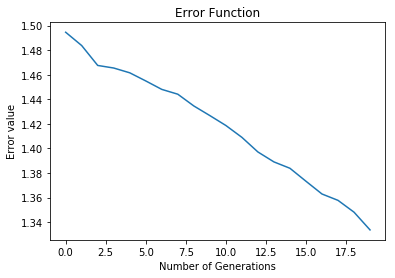

In [29]:
plt.title("Error Function")
plt.plot(minError)

plt.xlabel("Number of Generations")
plt.ylabel("Error value")

In [23]:
parent1.calcula([1,1,1])

[0.4793742064383305]

In [30]:
for j in range (len(inputCode)):
    print(logicFunction2(inputCode[j]))

0
0
1
1
1
1
1
1


In [19]:

for i in range (nIndividuals):
    print("Neural Network " + str(i))
    for j in range(nLayers):
        print("Layer " + str(j))
        for m in range(neuralNetworks[i].neuronsInLayer[j]):
            print("Neuron " + str(m))
            print(neuralNetworks[i].layers[j].neurons[m].bias)
            print(neuralNetworks[i].layers[j].neurons[m].weight)

Neural Network 0
Layer 0
Neuron 0
-1.2743215282941562
[0.8477297651937123, 0.6084853033319078, -0.5758696444593538]
Neuron 1
1.8718862431323933
[0.5930563195845628, 0.904313876608009, 0.8927112207417429]
Neuron 2
-0.3122298358296227
[0.514862585968328, -0.1656131386454638, 0.9451401037590177]
Layer 1
Neuron 0
-0.20212473542209608
[0.6041210216360882, 0.5882476666631911, 0.049201003529314224]
Neuron 1
2.845884138640149
[-0.8074556664814441, 0.41295451901017843, -0.8976583951450663]
Neuron 2
0.6503711687878715
[-0.3006618946019952, -0.8747741148713852, -0.5712255707626894]
Layer 2
Neuron 0
0.7673492278343454
[0.06383972620006895, 0.7129302598384697, -0.7031773553748693]
Neural Network 1
Layer 0
Neuron 0
1.0549216704837594
[0.5691856520484944, -0.23138263214505073, -0.31687237830036974]
Neuron 1
-0.1878805190232038
[0.21006478878793633, -0.6679461442762424, -0.18391341003475814]
Neuron 2
-0.6666646951797186
[-0.3819241476745323, -0.1649893752368079, -0.32793230658826733]
Layer 1
Neuron 0
